### Import libraries

In [7]:
import os
import spacy
import docx2txt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

### Datasets

In [17]:
file_path = r'Dataset/Resumes/'
doc_file = []
docx_file = []
pdf_file = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path + folder
    for file in os.listdir(folder_path):
        if file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        else: 
            pdf_file.append(file)
            folder_name.append(folder)

In [20]:
print(f"Number of .doc file:{len(doc_file)}" '\n'
       f"Number of .docx file:{len(docx_file)}" '\n'
        f"Number of .pdf file:{len(pdf_file)}" '\n')

print(f"Total Number of files :{len(doc_file) + len(docx_file) + len(pdf_file)}") 


Number of .doc file:26
Number of .docx file:52
Number of .pdf file:1

Total Number of files :79


### Types of file format

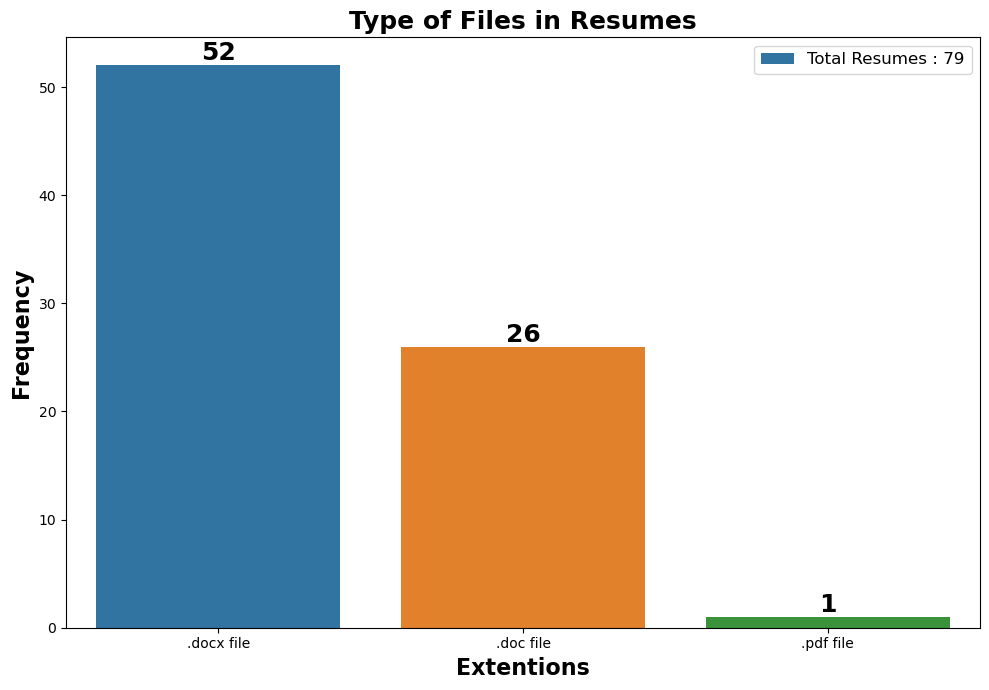

In [25]:
fig, axe = plt.subplots(figsize = (10, 7), dpi = 100)
ax = sns.barplot(x = ['.docx file', '.doc file','.pdf file'], y = [len(docx_file), len(doc_file), len(pdf_file)], 
                  ax = axe, label = f"Total Resumes : {len(doc_file) + len(docx_file) + len(pdf_file)}")

axe.set_xlabel('Extentions', size = 16, fontweight = 'bold')
axe.set_ylabel('Frequency', size = 16, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i, color = 'black',  fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

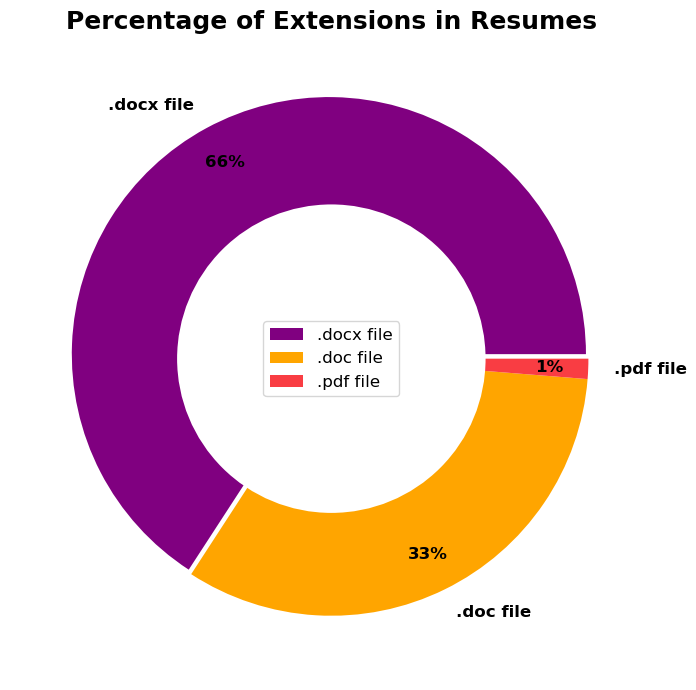

In [37]:
fig = plt.figure(figsize = (10, 7), dpi = 100)

sizes = [len(docx_file), len(doc_file), len(pdf_file)]
labels = ['.docx file', '.doc file','.pdf file']
colors = ['purple', 'orange', '#F93D43']
explode = (0.02, 0.00, 0.00)

plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.0f%%', pctdistance= 0.85,
         explode = explode, startangle = 0, textprops = {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)

plt.legend(labels, loc = 'center', fontsize = 'large')
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

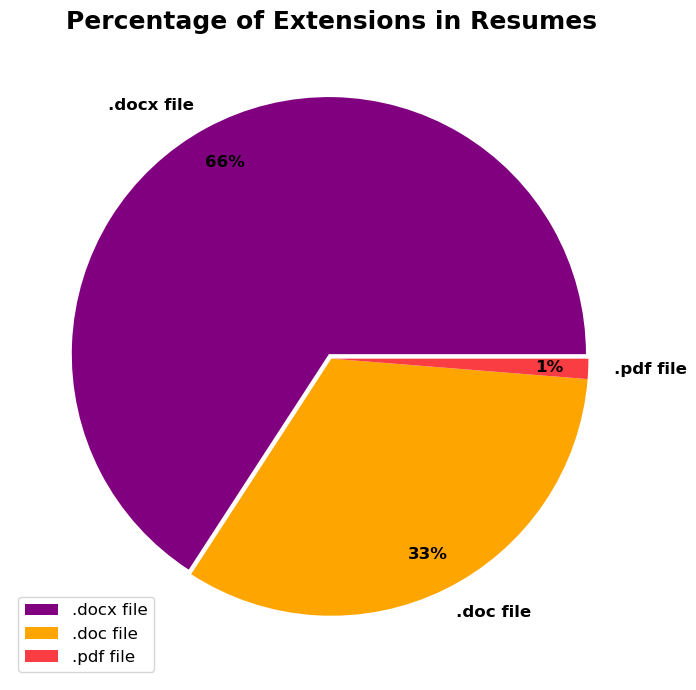

In [35]:
fig = plt.figure(figsize = (10, 7), dpi = 100)

sizes = [len(docx_file), len(doc_file), len(pdf_file)]
labels = ['.docx file', '.doc file','.pdf file']
colors = ['purple', 'orange', '#F93D43']
explode = (0.02, 0.00, 0.00)

plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.0f%%', pctdistance= 0.85,
         explode = explode, startangle = 0, textprops = {'size':'large', 'fontweight':'bold'})

plt.legend(labels, loc = 'best', fontsize = 'large')
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

### Extract Resumes by Profile Category

In [41]:
file_path = r'Dataset/Resumes/'
file_name = []
profile = []


for folder in os.listdir(file_path):
    folder_path = file_path + folder
    for file in os.listdir(folder_path):
        if file.endswith('.docx'):
            file_name.append(file)
            profile.append(folder)
        elif file.endswith('.doc'):
            file_name.append(file)
            profile.append(folder)
        else: 
            file_name.append(file)
            profile.append(folder)

In [42]:
data_resume = pd.DataFrame()
data_resume['Profile'] = profile
data_resume['Resumes'] = file_name
data_resume

,Profile,Resumes
0,PeopleSoft,Peoplesoft Admin_AnubhavSingh.docx
1,PeopleSoft,Peoplesoft Admin_G Ananda Rayudu.doc
2,PeopleSoft,Peoplesoft Admin_Gangareddy.doc
3,PeopleSoft,Peoplesoft Admin_Murali.docx
4,PeopleSoft,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,Workday,Sri Krishna S_Hexaware.doc
75,Workday,Srikanth-Hexaware.docx
76,Workday,SSKumar_Hexaware.docx
77,Workday,Venkateswarlu B_Hexaware.doc


In [43]:
data_resume['Profile'].value_counts()

React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Profile, dtype: int64

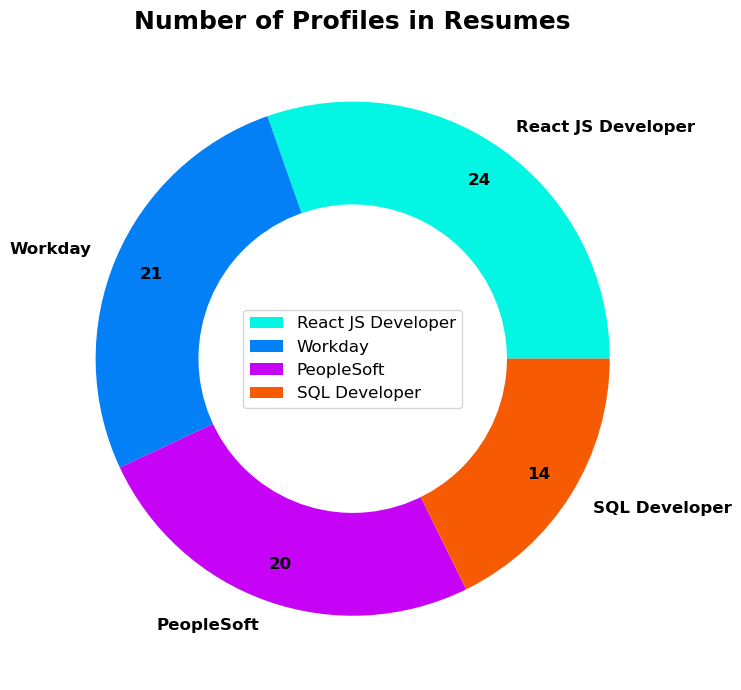

In [45]:
fig = plt.figure(figsize = (10, 7), dpi = 100)

sizes = data_resume['Profile'].value_counts()
labels = data_resume['Profile'].value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.00, 0.00, 0.00, 0.00)

plt.pie(sizes, colors = colors, labels = labels, autopct = lambda x:'{:.0f}'.format(x*sizes.sum()/100), pctdistance= 0.85,
         explode = explode, startangle = 0, textprops = {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)

plt.legend(labels, loc = 'center', fontsize = 'large')
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

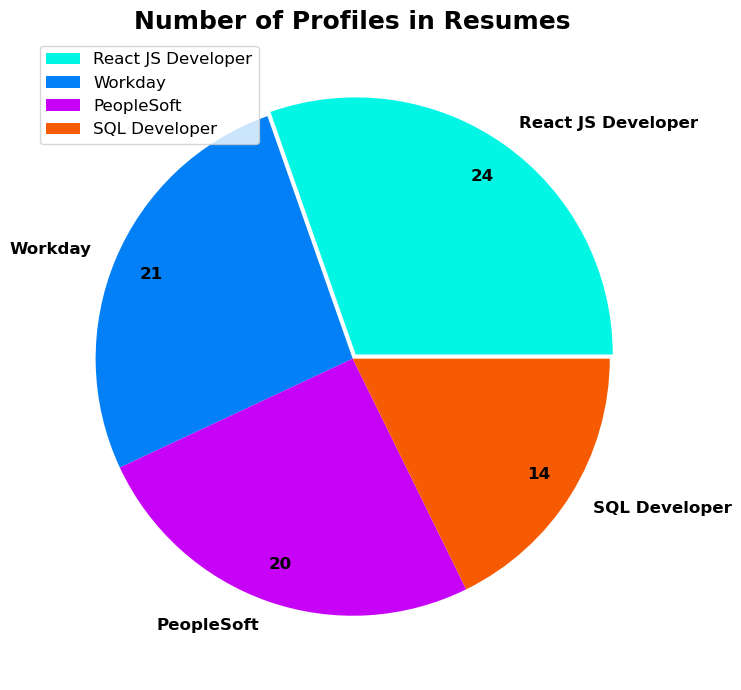

In [48]:
fig = plt.figure(figsize = (10, 7), dpi = 100)

sizes = data_resume['Profile'].value_counts()
labels = data_resume['Profile'].value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.02, 0.00, 0.00, 0.00)

plt.pie(sizes, colors = colors, labels = labels, autopct = lambda x:'{:.0f}'.format(x*sizes.sum()/100), pctdistance= 0.85,
         explode = explode, startangle = 0, textprops = {'size':'large', 'fontweight':'bold'})



plt.legend(labels, loc = 'upper left', fontsize = 'large')
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

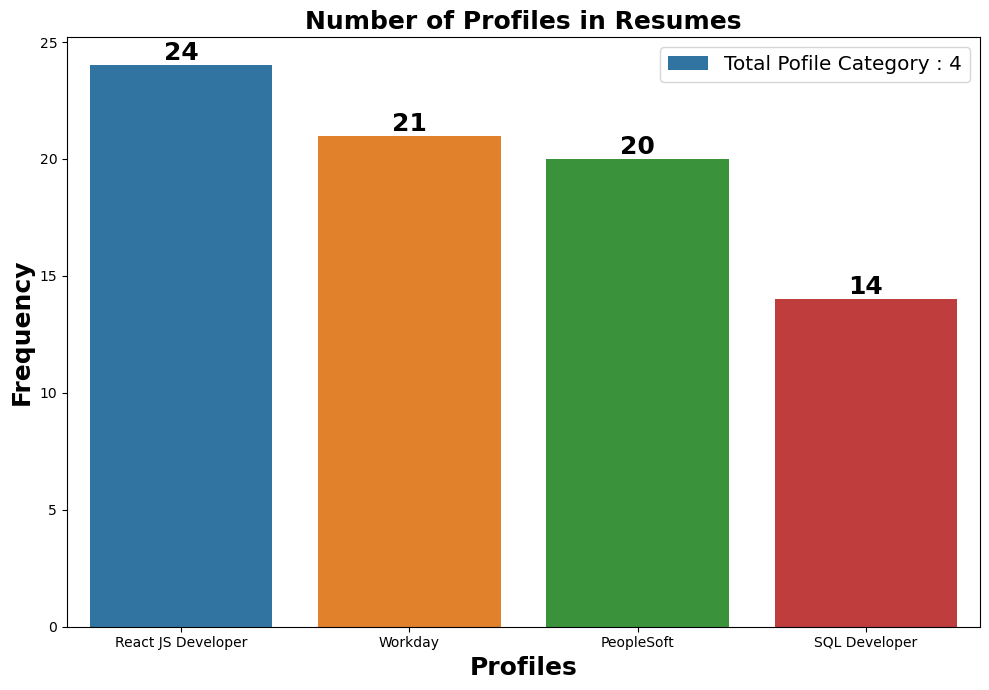

In [50]:
fig, axe = plt.subplots(figsize = (10, 7), dpi = 100)
ax = sns.barplot(x = data_resume['Profile'].value_counts().index, y = data_resume['Profile'].value_counts(), 
                  data = data_resume, ax = axe, label = f"Total Pofile Category : {len(data_resume['Profile'].unique())}")

axe.set_xlabel('Profiles', size = 18, fontweight = 'bold')
axe.set_ylabel('Frequency', size = 18, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i, color = 'black',  fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

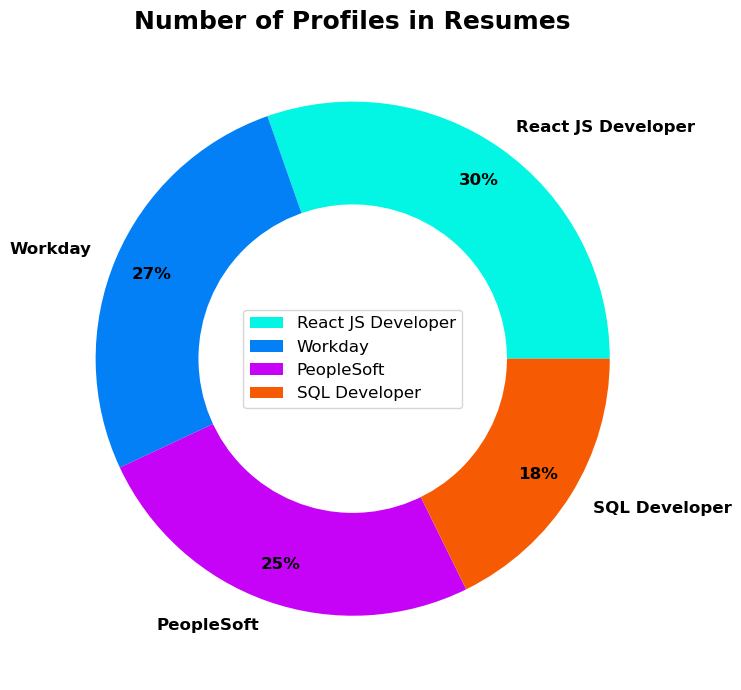

In [51]:
fig = plt.figure(figsize = (10, 7), dpi = 100)

sizes = data_resume['Profile'].value_counts()
labels = data_resume['Profile'].value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
explode = (0.00, 0.00, 0.00, 0.00)

plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.0f%%', pctdistance= 0.85,
         explode = explode, startangle = 0, textprops = {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)

plt.legend(labels, loc = 'center', fontsize = 'large')
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

### Reading a Resume File

In [52]:
def extract_text_from_resumedocx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_resumedocx('Dataset/Resumes/React JS Developer/React Developer_Deepakreddy.docx'))

Kanumuru Deepak Reddy



 



CAREER OBJECTIVE:



To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.



ACADEMIC QUALIFICATIONS:





Qualification

Institute

Board (or) University

Year of completion

Percentage/CGPA

B.Tech (E.C.E)

Audisankara College of Engineering & Technology,Gudur.

JNTU Anantapur.

2018

77.3

Intermediate

Narayana Junior college, Naidupet.

Board of

Intermediate, AP.

2014

89.5

SSC

Navodaya High School,Naidupet

Board of Secondary education, AP.

2012

6.7



PROJECT:



Title :Density based Traffic Control System USING ARDUINO.



Duration:4 months.



Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend 

### Data Exploration

In [54]:
data_resume = pd.read_csv('Dataset/Cleaned_Resumes.csv')
data_resume    

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [55]:
TextBlob(data_resume['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [57]:
TextBlob(data_resume['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [58]:
TextBlob(data_resume['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [59]:
data_resume['Resume_Details']

0     anubhav kumar singh work globally competitive ...
1     ananda rayudu profile summary years experience...
2     peoplesoft database administrator gangareddy p...
3     classification internal murali experience summ...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    workday integration consultant name sri krishn...
75    seeking suitable positions workday hcm techno ...
76    workday hcm fcm name role kumar workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 79, dtype: object

### Top 20 most used words in Resumes

In [61]:
countvec = CountVectorizer(stop_words = stopwords.words('english'), ngram_range = (1, 2))
ngrams = countvec.fit_transform(data_resume['Resume_Details'])
count_values = ngrams.toarray().sum(axis = 0)

vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i], k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [62]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
5,358,server
6,331,data
7,326,reports
8,323,project
9,280,sql


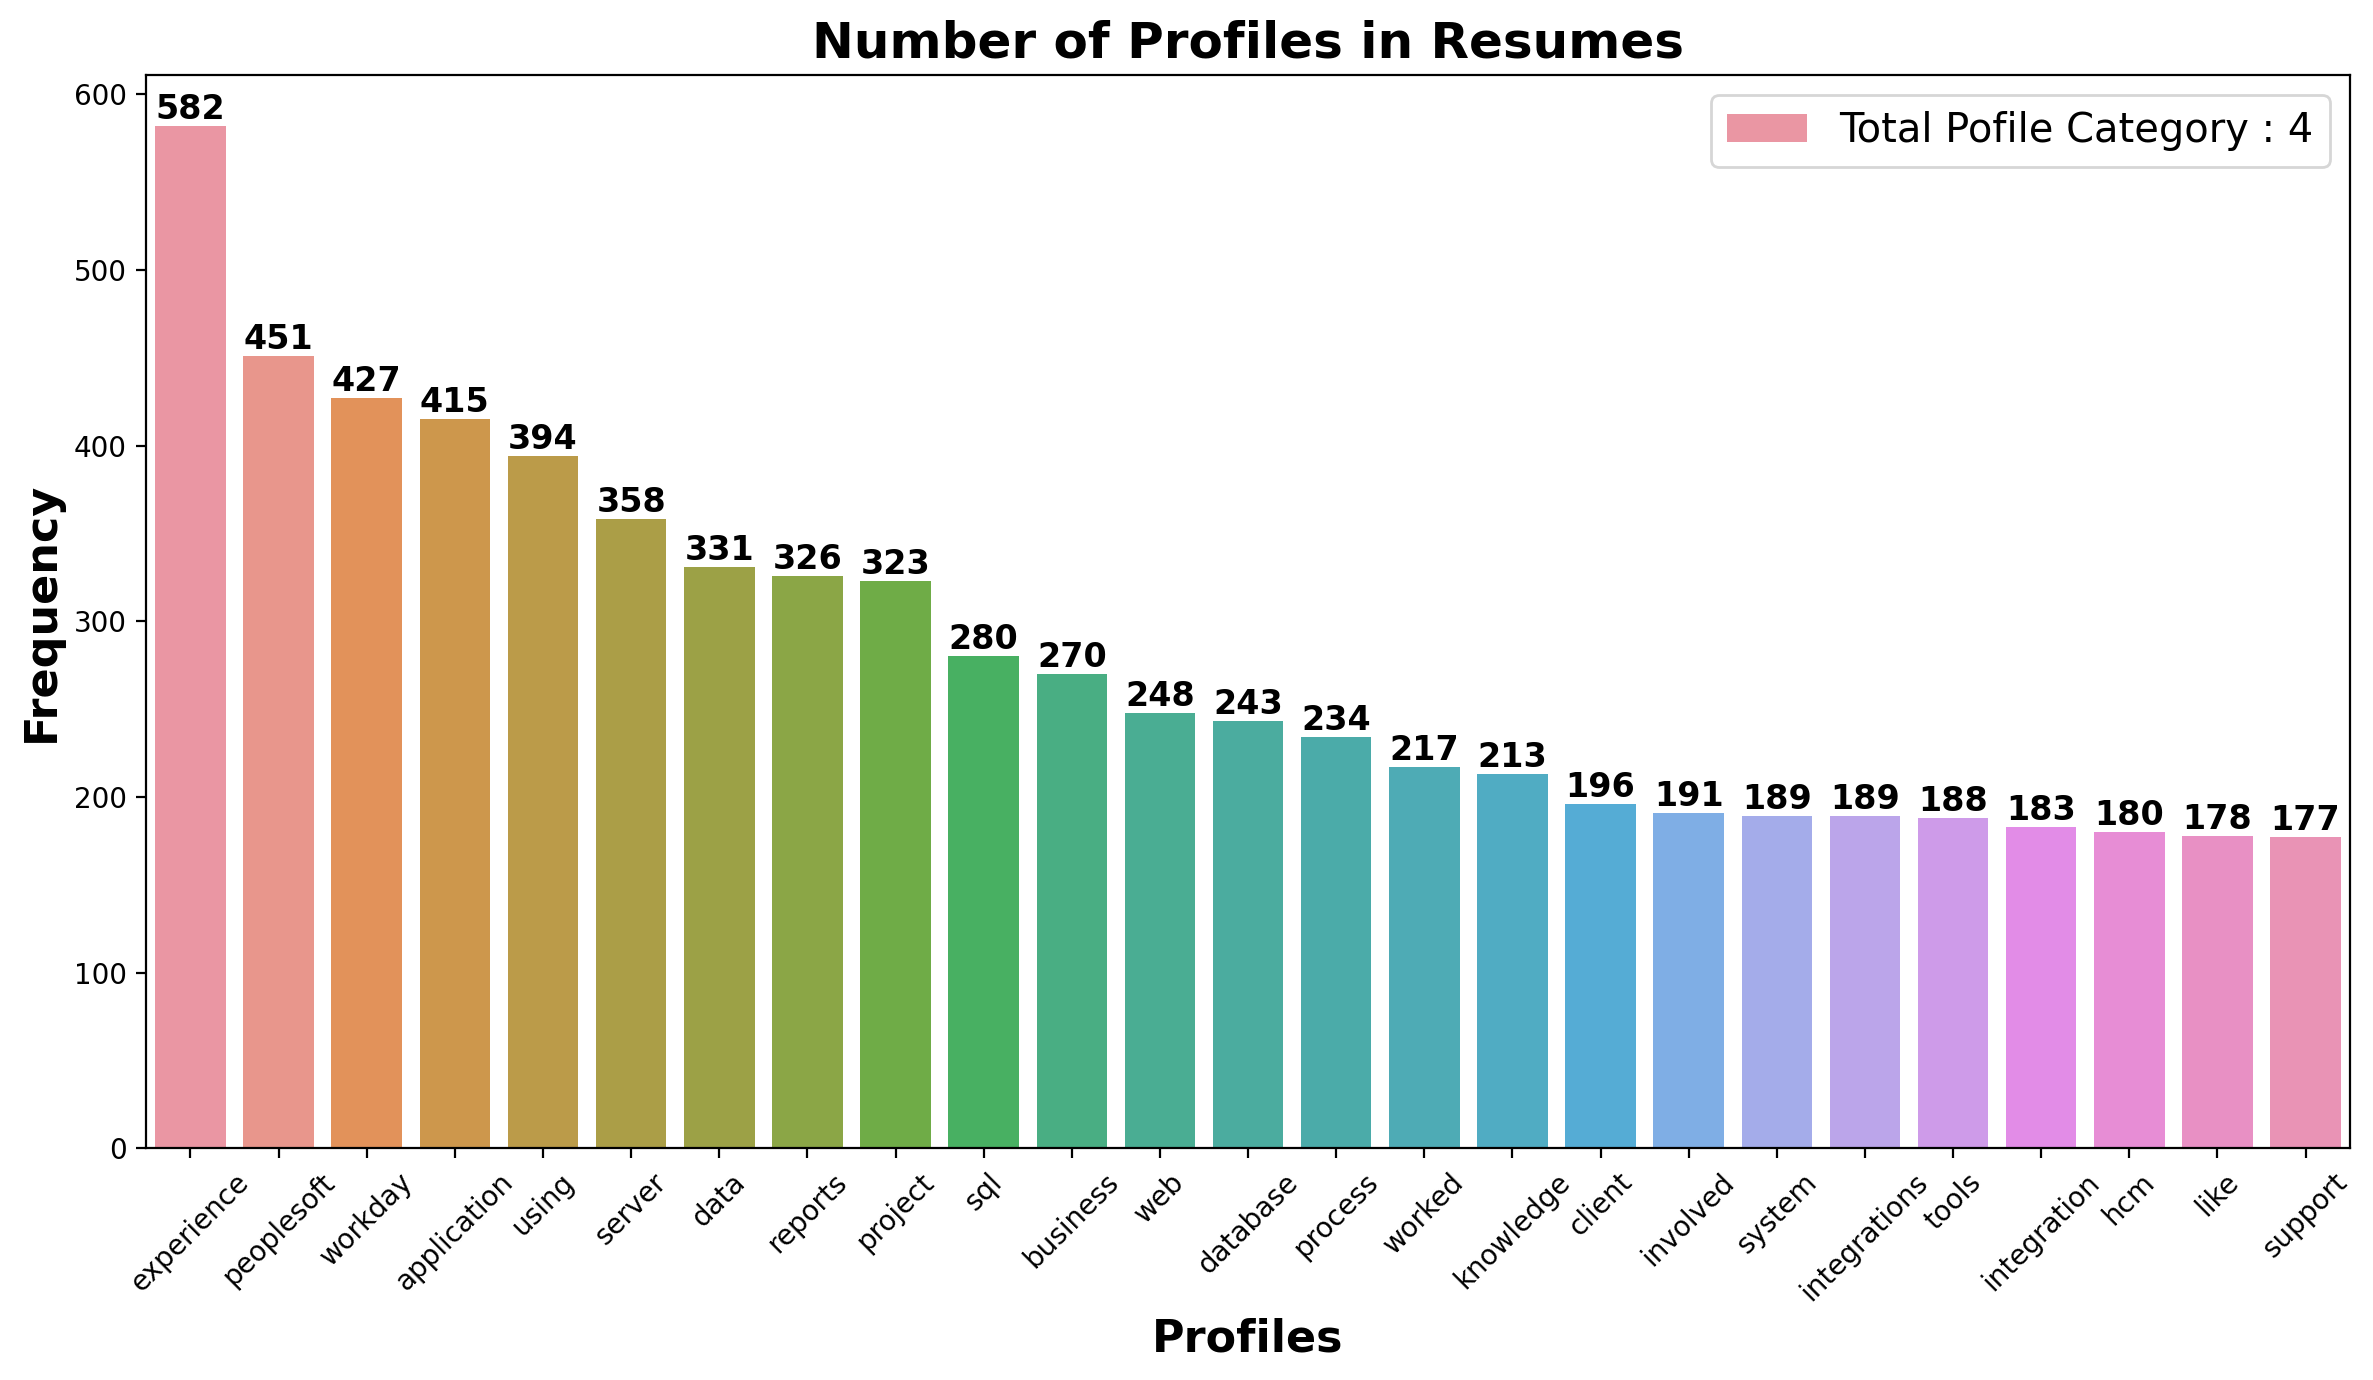

In [70]:
fig, axe = plt.subplots(figsize = (12, 7), dpi = 200)
ax = sns.barplot(x = df_ngram['Unigram_Bigram'].head(25), y = df_ngram['Frequency'].head(25), 
                  data = data_resume, ax = axe, label = f"Total Pofile Category : {len(data_resume['Category'].unique())}")

axe.set_xlabel('Profiles', size = 16, fontweight = 'bold')
axe.set_ylabel('Frequency', size = 16, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.legend(loc = 'best', fontsize = 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i, color = 'black',  fontsize= 12, fontweight= 'bold')
    
fig.tight_layout()
plt.show()

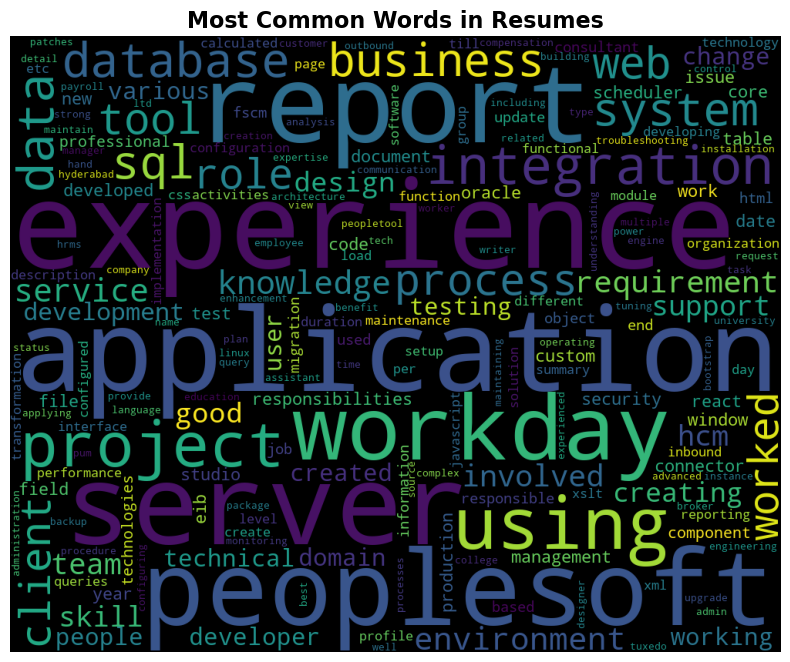

In [75]:
text = " ".join(cat for cat in data_resume['Resume_Details'])
word_cloud = WordCloud(width = 1000, height = 800, random_state = 10,
                      collocations = False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 8), dpi=100)
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis('off')

plt.show()